In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'D:\download\covid_19_india.csv')
df1=pd.read_csv(r'D:\download\covid_vaccine_statewise.csv')

df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df['active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])

In [7]:
df.sample(7)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,active_cases
7251,7252,2020-10-12,8:00 AM,Puducherry,-,-,26291,563,31549,4695
15107,15108,2021-05-20,8:00 AM,Manipur,-,-,33813,635,41265,6817
2549,2550,2020-06-01,8:00 AM,Rajasthan,-,-,5927,194,8831,2710
13992,13993,2021-04-19,8:00 AM,Meghalaya,-,-,14038,153,14871,680
15222,15223,2021-05-23,8:00 AM,Rajasthan,-,-,779601,7590,909521,122330
11779,11780,2021-02-17,8:00 AM,Chandigarh,-,-,20813,347,21293,133
8166,8167,2020-11-07,8:00 AM,Telengana,-,-,227583,1372,248891,19936


In [8]:
statewise=pd.pivot_table(df, index='State/UnionTerritory' , values=['Cured','Deaths','Confirmed'], aggfunc=max)

In [9]:
statewise['Recovery_Rate']=statewise['Cured']*100/statewise['Confirmed']
statewise['Mortality_Rate']=statewise['Deaths']*100/statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


In [10]:
statewise.sort_values(by=['Confirmed'] , ascending=True)

,Confirmed,Cured,Deaths,Recovery_Rate,Mortality_Rate
State/UnionTerritory,,,,,
Daman & Diu,2,0,0,0.000000,0.000000
Unassigned,77,0,0,0.000000,0.000000
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Lakshadweep,10263,10165,51,99.045114,0.496931
Dadra and Nagar Haveli,10377,10261,4,98.882143,0.038547
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4,99.924911,0.037545
Ladakh,20411,20130,207,98.623291,1.014159
Sikkim,28018,25095,356,89.567421,1.270612


In [11]:
top_active_states=df.groupby(by='State/UnionTerritory').max()[['active_cases', 'Deaths']].sort_values(by='active_cases',ascending=False).iloc[:11].reset_index()
top_active_states

,State/UnionTerritory,active_cases,Deaths
0,Maharashtra,701614,134201
1,Karnataka,605515,36848
2,Kerala,445692,18004
3,Tamil Nadu,313048,34367
4,Uttar Pradesh,310783,22775
5,Rajasthan,212753,8954
6,Andhra Pradesh,211554,13564
7,Gujarat,148297,10077
8,West Bengal,132181,18252
9,Chhattisgarh,131245,13544


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Statewise Active Cases'}, xlabel='State/UnionTerritory', ylabel='active_cases'>

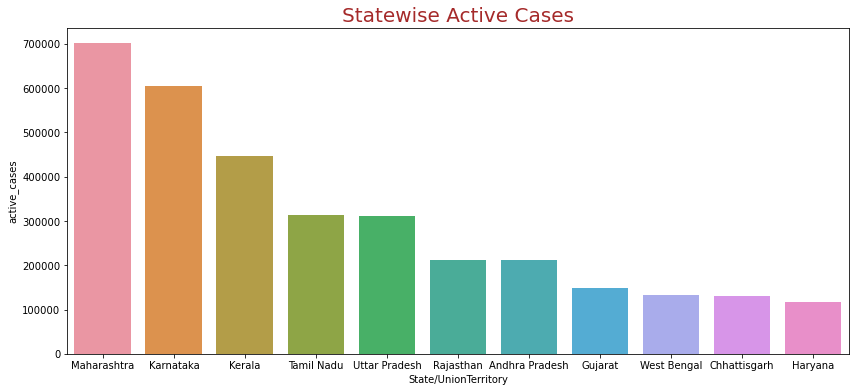

In [12]:
plt.figure(figsize=(14,6))
plt.title('Statewise Active Cases', color='brown',size='20')
sns.barplot(top_active_states['State/UnionTerritory'],top_active_states['active_cases'])

In [13]:
top_states_highest_death=df.groupby(by='State/UnionTerritory').max()[['active_cases', 'Deaths']].sort_values(by='Deaths',ascending=False).iloc[:11].reset_index()
top_states_highest_death

,State/UnionTerritory,active_cases,Deaths
0,Maharashtra,701614,134201
1,Maharashtra***,97932,130753
2,Karnataka,605515,36848
3,Karanataka,27550,36197
4,Tamil Nadu,313048,34367
5,Delhi,103424,25068
6,Uttar Pradesh,310783,22775
7,West Bengal,132181,18252
8,Kerala,445692,18004
9,Punjab,79963,16322


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top States With Highest Death'}, xlabel='State/UnionTerritory', ylabel='Deaths'>

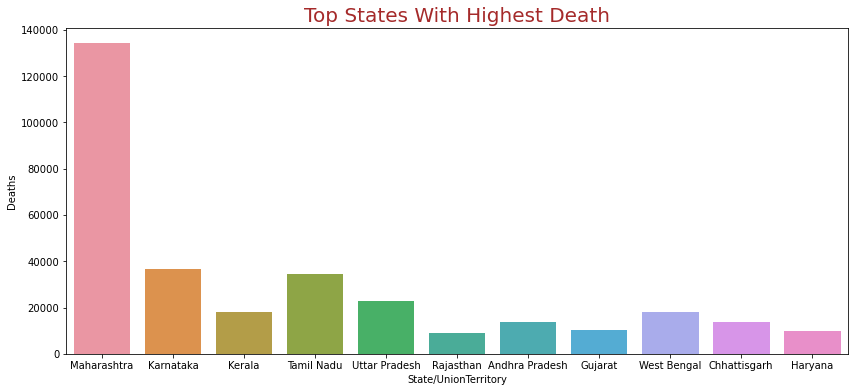

In [14]:
plt.figure(figsize=(14,6))
plt.title('Top States With Highest Death', color='brown',size='20')
sns.barplot(top_active_states['State/UnionTerritory'],top_active_states['Deaths'])

<AxesSubplot:xlabel='Date', ylabel='active_cases'>

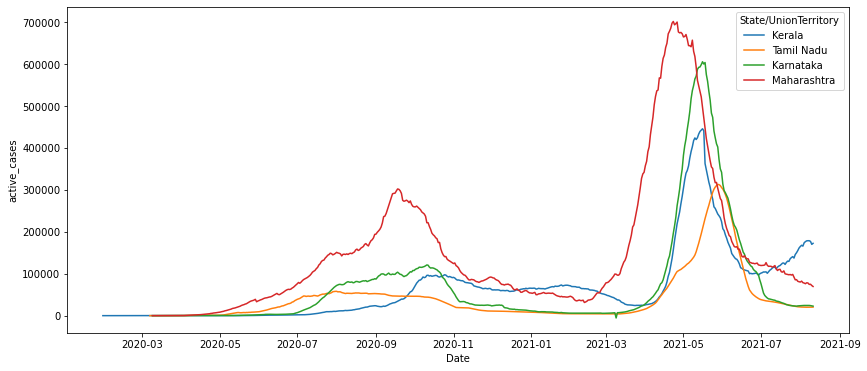

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka','Kerala','Tamil Nadu'])] , x='Date', y='active_cases',hue='State/UnionTerritory')


In [16]:
df1.head()
df1.shape

(7845, 24)

In [17]:
df1.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [18]:
df1.drop(['AEFI','Sputnik V (Doses Administered)','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)','18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'],axis=1,inplace=True)

In [19]:
df1.sample(6)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
7048,08/03/2021,Tripura,146407.0,5111.0,375.0,113725.0,32682.0,68770.0,44952.0,3.0,65.0,113660.0,NaN,NaN,NaN,113725.0
941,19/04/2021,Assam,1676713.0,328720.0,2338.0,1351522.0,325191.0,749428.0,601937.0,157.0,253460.0,1423253.0,NaN,NaN,NaN,1351522.0
4072,28/02/2021,Lakshadweep,1931.0,59.0,13.0,1824.0,107.0,1410.0,414.0,0.0,4.0,1820.0,NaN,NaN,NaN,1824.0
3797,27/07/2021,Kerala,18942910.0,348114.0,730.0,13233990.0,5708920.0,9092117.0,9847543.0,3250.0,1746313.0,17176726.0,NaN,NaN,NaN,NaN
5929,08/08/2021,Puducherry,748322.0,75310.0,48.0,597542.0,150780.0,364702.0,383476.0,144.0,74.0,748248.0,NaN,NaN,NaN,NaN
3614,25/01/2021,Kerala,43561.0,1302.0,347.0,43561.0,0.0,11213.0,32347.0,1.0,0.0,43561.0,NaN,NaN,NaN,43561.0


([<matplotlib.patches.Wedge at 0x2c5e55cad30>,
 [Text(-0.10472681424709744, 1.0950033307609863, 'male'),
  Text(0.1047268142470973, -1.0950033307609863, 'female')])

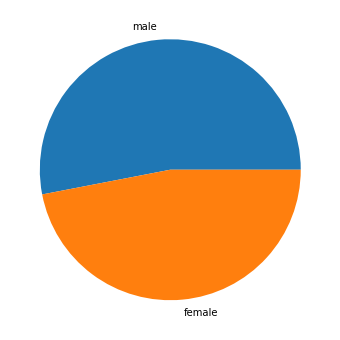

In [20]:
male=df1['Male(Individuals Vaccinated)'].sum()
female=df1['Female(Individuals Vaccinated)'].sum()
# trans=df1['Transgender(Individuals Vaccinated)'].sum()
x=np.array([male,female])
plt.figure(figsize=(14,6))
plt.pie(x,labels=['male','female'])

In [27]:
df1.sample(5)

,Vaccinated date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
2465,28/05/2021,Gujarat,16506745.0,395613.0,1823.0,12450336.0,4056409.0,6665620.0,5783096.0,1620.0,1947731.0,14559014.0,NaN,NaN,NaN,12450336.0
3554,26/06/2021,Karnataka,21622289.0,2949768.0,4412.0,18089135.0,3533154.0,11038098.0,10580653.0,3538.0,2481521.0,19137845.0,NaN,NaN,NaN,NaN
3876,16/03/2021,Ladakh,38926.0,3700.0,27.0,35573.0,3353.0,20363.0,15207.0,3.0,0.0,38926.0,NaN,NaN,NaN,35573.0
7223,30/01/2021,Uttar Pradesh,433040.0,9585.0,3563.0,433040.0,0.0,131777.0,301226.0,37.0,5468.0,427572.0,NaN,NaN,NaN,433040.0
3060,17/04/2021,Jammu and Kashmir,1588988.0,157750.0,1381.0,1358605.0,230383.0,832897.0,525472.0,236.0,0.0,1588988.0,NaN,NaN,NaN,1358605.0


In [22]:
df1.rename(columns={'Updated On':'Vaccinated date','Total Individuals Vaccinated':'Total'},inplace=True)

In [37]:
df1=df1[df1['State']!='India']
max_vacinated_states=df1.groupby('State').max()['Total'].reset_index()
max_vacinated_states.sort_values(by='Total',ascending=False).iloc[:11].reset_index()

,index,State,Total
0,33,Uttar Pradesh,24782239.0
1,20,Maharashtra,24046509.0
2,28,Rajasthan,19090259.0
3,10,Gujarat,18826982.0
4,15,Karnataka,17493598.0
5,19,Madhya Pradesh,16512594.0
6,35,West Bengal,15798841.0
7,4,Bihar,13127210.0
8,30,Tamil Nadu,11658908.0
9,1,Andhra Pradesh,11586263.0
